## Generate trajectory
This notebook can be used to generate new trajectories

#### Setup

In [1]:
import pathlib
import os
import habitat_sim
from src.data import scene
from src.visualisation.observation_visualisation import display_sample
from IPython.display import clear_output
import numpy as np



/opt/conda/envs/habitat/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
while (pathlib.PurePath(os.getcwd()).name in ['notebooks', 'dev'] or 
       pathlib.PurePath(os.getcwd()).name.startswith('3dvp')):
    os.chdir('..')

In [3]:
key_inputs = {'w': 'move_forward', 'a':'turn_left', 'd':'turn_right'}

In [4]:
scene_split = "train"
scene_id = "00006-HkseAnWCgqk"

In [5]:
sim = scene.initialize_sim(scene_split, scene_id)
semantic_sensor_used = scene.check_if_semantic_sensor_used(sim)

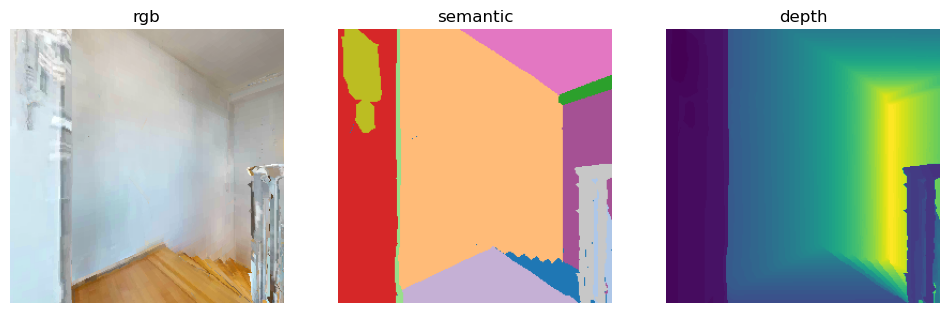

In [6]:
total_frames = 0

max_frames = 500
observations = sim.step('move_forward')
taken_actions = []

while total_frames <= max_frames:
    try:
        rgb = observations["color_sensor"]
        semantic = observations["semantic_sensor"] if semantic_sensor_used else np.array([])
        #semantic = observations["semantic_sensor"]
        depth = observations["depth_sensor"]            

        if display:
            clear_output()
            display_sample(rgb, semantic_obs = semantic, depth_obs=depth)

        key_input = input()
        if key_input not in key_inputs.keys():
            print("Invalid action!")
        else:
            observations = sim.step(key_inputs[key_input])
            taken_actions.append(key_inputs[key_input])

        total_frames += 1
    except KeyboardInterrupt:
        break

#### When you are done, take the output of the following cell and copy it into config/trajectories.json

In [7]:
taken_actions_string = str(taken_actions).replace("\'", "\"")
print(f'"{scene_split}/{scene_id}": {taken_actions_string}')

"train/00006-HkseAnWCgqk": ["turn_left", "turn_left", "turn_left", "turn_left", "turn_left", "turn_left", "turn_left", "turn_left", "turn_left", "turn_left", "turn_left", "turn_left", "turn_left", "turn_left", "turn_left", "move_forward", "move_forward", "move_forward", "move_forward", "turn_right", "turn_right", "turn_right", "move_forward", "move_forward", "turn_left", "move_forward", "move_forward", "turn_right", "move_forward", "move_forward", "move_forward", "move_forward", "move_forward", "move_forward", "move_forward", "turn_right", "turn_right", "move_forward", "move_forward", "turn_right", "move_forward", "move_forward", "move_forward", "turn_left", "move_forward", "move_forward", "move_forward", "move_forward", "turn_right", "turn_right", "turn_right", "turn_right", "turn_right", "turn_right", "turn_right", "turn_right", "turn_right", "turn_right", "turn_left", "turn_left", "turn_left", "turn_left", "turn_left", "move_forward", "move_forward", "turn_right", "move_forward", "m